## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## The steps we will follow in this are as follows:

   - Step 1: Reading and Understanding the Data

 - Data Pre-processing: Steps 2,3 and 4

   - Step 2: Visualising the Data

   - Step 3: Data Preparation

   - Step 4: Splitting the Data into Training and Testing Sets
   
 - Building the model and analysis

   - Step 5: Building a linear model : Forward step and backward elimination.

   - Step 6: Residual Analysis of the train data

   - Step 7: Validating assumptions

   - Step 8: Making Predictions Using the Final Model
   
   - Step 9: Model Evaluation
   
- Finally, conclusion about demand based on the model.

In [1]:
## filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 1: Reading and Understanding the Data

In [3]:
## importing dataset
bike = pd.read_csv('day.csv')

In [4]:
## checking out dataset
pd.set_option('display.max_columns', None)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
## shape
bike.shape

(730, 16)

In [6]:
## info for null values and datatypes
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- No null values, dteday dtype probably needs to be changed to get insights

In [7]:
## describe
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- Outliers not a problem here

In [8]:
## checking unique values
bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

- Following catagorical:
  - season          4
  - yr              2
  - mnth           12
  - holiday         2
  - weekday         7
  - workingday      2
  - weathersit      3
- some of these would have to be encoded.

## Data Pre-Processing

## Step 2: Visualising the Data

### With Visualisation we aim to see 2 things broadly
- 1. Whether linear regression makes sense or not. In this case `cnt` should be in some way linearly related to atleast some of the variables.
- 2. To check for multicollinearity.

In [9]:
## creating a sub-dataset to make pairplot between the dependent variables cnt and the constinous numeric variables
bike_pair = bike[['temp','atemp','hum','windspeed','cnt']]

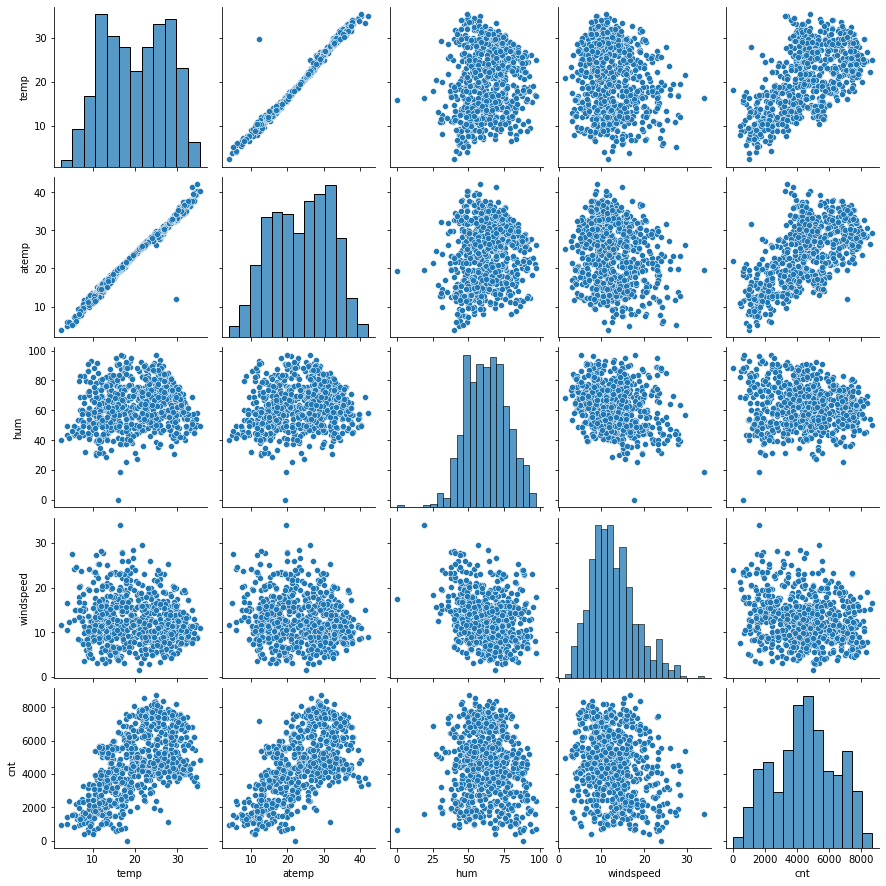

In [10]:
## plotting the pairplot
sns.pairplot(bike_pair)
plt.show()

- We can conclude that there is some sort of linear relationship between `cnt` and numeric variables, especially the `temp` and `atemp`, which seem to show a good relationship with `cnt`.

#### Visualising Categorical Variables

As our initial analysis shows, there are a `seven categorical variables` in the dataset. Let's make a boxplot for some of these variables, as Boxplot provides a good way to visualise a catagorical variable vis-a-vis a numerical variable. 
In the present case, the numerical variable is the target variable i.e `cnt`!

-  We have 7 main catagorical variables in the dataset, namely:
    - season
    - yr
    - mnth
    - holiday
    - weekday
    - workingday
    - weathersit 

We will be plotting them togther using subplot technique. The subplot would be having 2 rows and 4 columns

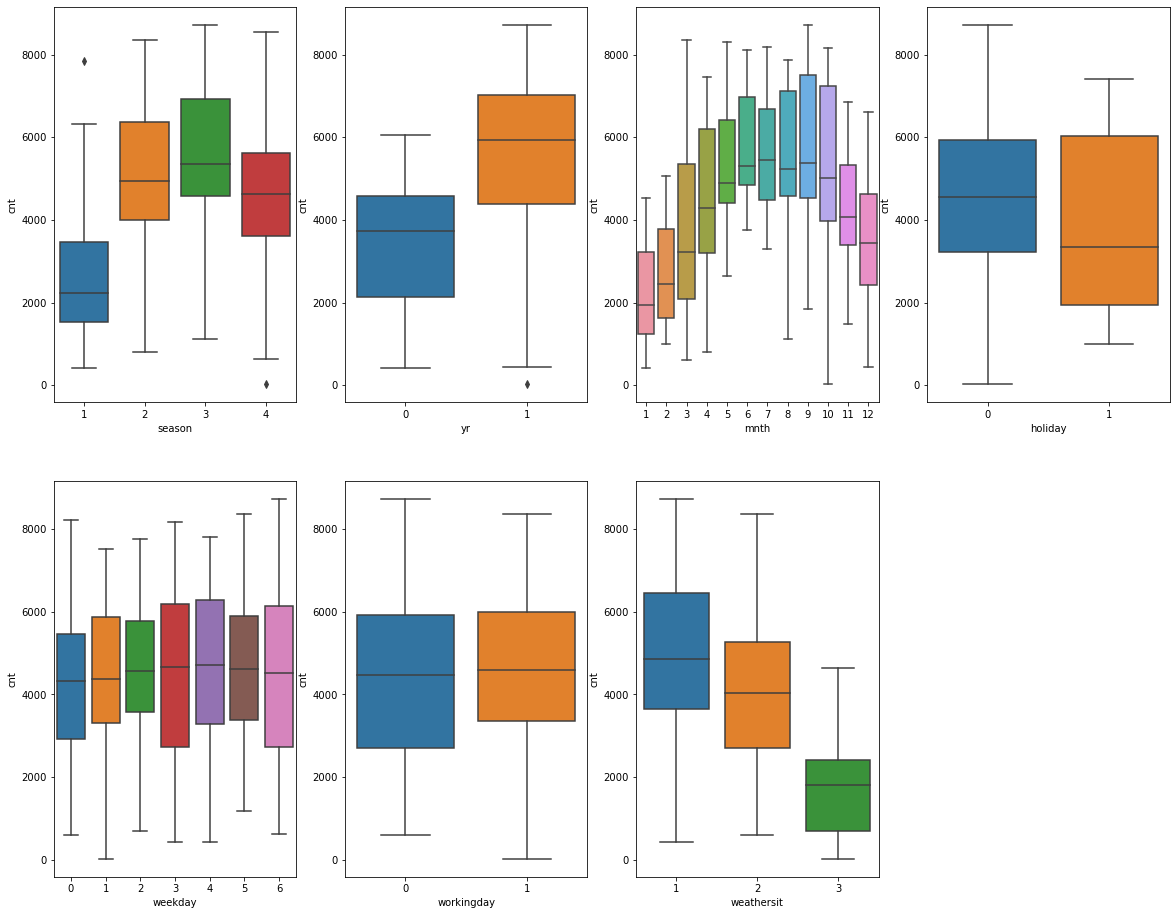

In [11]:
plt.figure(figsize=(20,16))
plt.subplot(2,4,1)
sns.boxplot(x= 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x= 'yr', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x= 'mnth', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x= 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x= 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x= 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x= 'weathersit', y = 'cnt', data = bike)
plt.show()

### Analysing the results of boxplots

- Overall , all the categorical variables do show a good relationship with the dependent variable. Though for some, this relationship is stronger.

### Analysing the plots individually 

- Adding a generic code using groupby( ) for boxplot analysis

#### Analysing season: 
- From what we can see in terms of the medians of the boxplots, maximum bookings occurred in season 3, followed by season 2, season 4 and least in season 1.
- Lets see the numeric values

In [12]:
## Analysing season 3
a = bike.groupby('season')
b = a.get_group(3)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing season 2
a = bike.groupby('season')
b = a.get_group(2)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing season 4
a = bike.groupby('season')
b = a.get_group(4)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing season 1
a = bike.groupby('season')
b = a.get_group(1)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))


32
28
26
14


- 2. In terms of the medians of the boxplots, maximum bookings occurred in season 3(32%), followed by season 2(28%), season 4(26%) and least in season 1(14%).

#### Analysing year
- 2019 seems to have higher bookings.

In [13]:
## Analysing season 3
a = bike.groupby('yr')
b = a.get_group(1)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))

62


-  62% bookings took place in 2019. This shows a strong relationship with the dependent variable ‘cnt’.

#### Analysing mnth

In [14]:
## Analysing mnth 1
a = bike.groupby('mnth')
b = a.get_group(1)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing mnth 2
a = bike.groupby('mnth')
b = a.get_group(2)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing mnth 3
a = bike.groupby('mnth')
b = a.get_group(3)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing mnth 4
a = bike.groupby('mnth')
b = a.get_group(4)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing mnth 5
a = bike.groupby('mnth')
b = a.get_group(5)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing mnth 6
a = bike.groupby('mnth')
b = a.get_group(6)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing mnth 7
a = bike.groupby('mnth')
b = a.get_group(7)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing mnth 8
a = bike.groupby('mnth')
b = a.get_group(8)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing mnth 9
a = bike.groupby('mnth')
b = a.get_group(9)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing mnth 10
a = bike.groupby('mnth')
b = a.get_group(10)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing mnth 11
a = bike.groupby('mnth')
b = a.get_group(11)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing mnth 12
a = bike.groupby('mnth')
b = a.get_group(12)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))


4
5
7
8
10
11
10
11
11
10
8
6


- Months 5, 6, 7, 8, 9 and 10 showed higher booking medians over other months.-

#### Analysing holiday

In [15]:
## Analysing holiday
a = bike.groupby('holiday')
b = a.get_group(0)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))

98


- 98 % bookings took place when it was not a holiday. Hence holiday has a very weak relationship with the dependent variable.

#### Analysing weekday

In [16]:
## Analysing weekday 0
a = bike.groupby('weekday')
b = a.get_group(0)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing weekday 1
a = bike.groupby('weekday')
b = a.get_group(1)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing weekday 2
a = bike.groupby('weekday')
b = a.get_group(2)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing weekday 3
a = bike.groupby('weekday')
b = a.get_group(3)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing weekday 4
a = bike.groupby('weekday')
b = a.get_group(4)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing weekday 5
a = bike.groupby('weekday')
b = a.get_group(5)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing weekday 6
a = bike.groupby('weekday')
b = a.get_group(6)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))

13
14
14
14
15
15
15


-  Weekday bookings don’t show much of difference in terms of percentages. However we cannot say that this relationship is weak. Let’s discover this further in the model.

#### Analysing workingday 

In [17]:
## Analysing when it a workingday
a = bike.groupby('workingday')
b = a.get_group(1)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))

70


- 70% bookings are taking place on a working day. This shows a strong relationship with the dependent variable ‘cnt’.

#### Analysing weathersit 

In [18]:
## Analysing weathersit 1
a = bike.groupby('weathersit')
b = a.get_group(1)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing weathersit 2
a = bike.groupby('weathersit')
b = a.get_group(2)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))
## Analysing weathersit 3
a = bike.groupby('weathersit')
b = a.get_group(3)
print(round(b['cnt'].sum()/bike['cnt'].sum()*100))


69
30
1


- With 69% bookings, Weathersit 1 is most favourable for bookings followed by Weathersit 2 (30%) and lastly Weathersit 3.

### Before we go to the data preperation stage, let us make some changes in then dataframe.
- We will begin by changing the dtype of dteday to gain better understanding of coluimns like weekday, holiday and working day.
- We will also drop columns like `instant`, `dteday`, `casual` and `registered`.
- We will again map a heatmap before we go to data preperation stage.

In [19]:
## changing tht dtype of the column dteday
bike['dteday'] = pd.to_datetime(bike['dteday'])

In [20]:
## importing datetime library
import datetime

In [21]:
## checking the the of the week
datetime.date(2018,1,1).strftime('%A')

'Monday'

In [22]:
datetime.date(2018,1,2).strftime('%A')

'Tuesday'

In [23]:
datetime.date(2018,1,7).strftime('%A')

'Sunday'

- So in the column weekday, 6 corresoponds to a monday, 0 to tuesday and 7 to sunday.

### Dropping columns

In [24]:
bike_new = bike.drop(['instant','dteday','casual','registered'],axis = 1)

In [25]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## checking co-relations

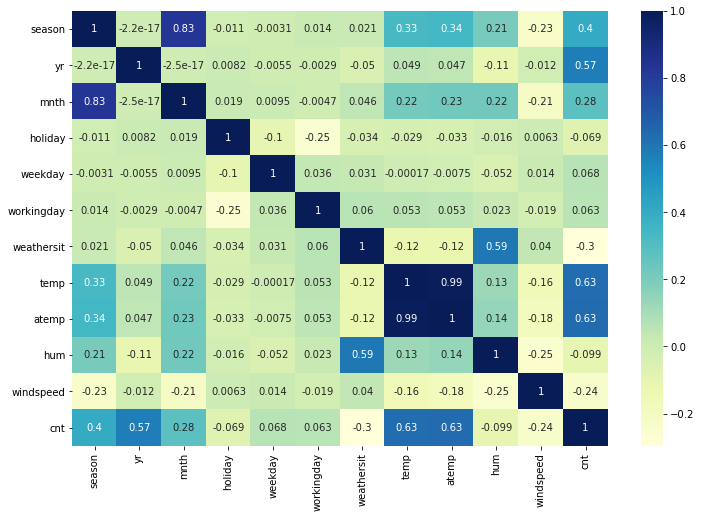

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(bike_new.corr(), annot = True, cmap='YlGnBu')
plt.show()

- Now we see that the independent variables have low co-relations amongst themselves, which is a good indicator.
- The only exc exceptions being:
    - temp and atemp
    - season and month 
    - weathersit and hum
  - These will be tackled during model building.

#### - At this point,  we can say that it's prudent to the next stage i.e Data Preparation.

# Step 3: Data Preparation

### During this stage, we will undertake the following operations:
- Encoding:
   - Converting binary vars to 1 and 0.
   - Other catagorical variables to dummy variables.
- Splitting the data into train and test
- Rescaling of variables

## Creating dummy variables

- We will be creating dummy variables fot the columns `'mnth'`,`'season'`,`'weekday'` and `'weathersit'` and will be dropping the first column for each columns of dummy variables to get `n-1` dummy variables in order to avoid 'dummy variable trap'.

In [27]:
## again looking at unique values to understand catagorical variables
bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

### Out of the 7 catagorical variables, 3(yr, holiday, workingday) have only 2 values of 0 and 1. As such, they are already in binary, so we dont need to create dummy variables for them.
### We will be creating dummy variables for only rest of the 4 columns.

In [28]:
## creating dummy variables 
## drop_first=True, to avoid dummy varaible trap
bike = pd.get_dummies(bike,columns = ['mnth','season','weekday','weathersit'],drop_first=True)

#### Checking out the altered dataframe

In [29]:
## shape
bike.shape

(730, 34)

In [30]:
## overview
bike.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


####  Dropping columns which are not required 

In [31]:
## dropping columns which are not required
bike.drop(['instant','dteday','casual','registered'],inplace=True,axis=1)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


- Now we have a dataset with all numeric data. 
- This dataset is now ready to be fed into our machine learning model. 
- But before we do so, we must first split the dataset into test and train set.
- we will also look at the co-relations again through the heatmap for the altered dataframe.

#### Heatmap for altered dataframe

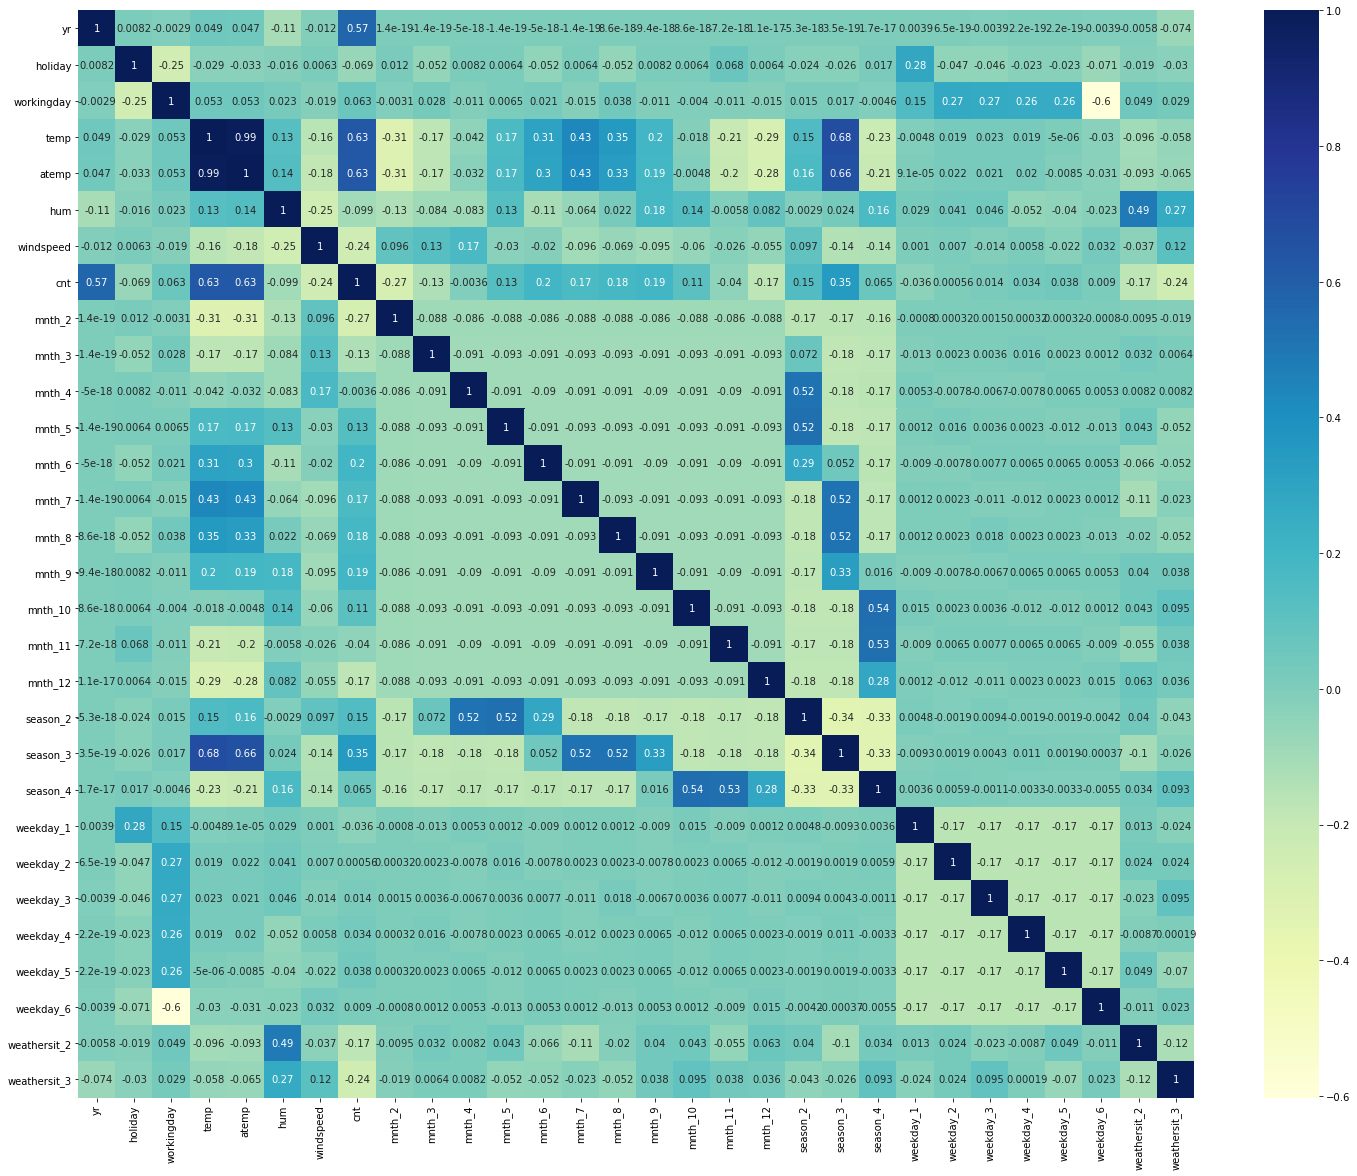

In [32]:
plt.figure(figsize=(25,20))
sns.heatmap(bike.corr(), annot = True, cmap='YlGnBu')
plt.show()

- Again we can see a general trend of low corelations among the variables

## Step 4: Splitting the Data into Training and Testing Sets 

In [33]:
## importing libraries
from sklearn.model_selection import train_test_split

In [34]:
## creating training and test datasets
bike_train, bike_test = train_test_split(bike,train_size=0.7,test_size=0.3,random_state=333)

In [35]:
## checking out the shape of training dataset
bike_train.shape

(510, 30)

## Step 5: Rescaling the Features

- We will be using MinMax scaler from sklearn.preprocessing
- Steps
   - 1. Create a list of numeric variables
   - 2. Instantiate an object
   - 3. Fit on data
- Here we dont want to scale all the columns, some are binary having only 0 and 1. 
- We want to scale the other columns. 
- We could scale the binary columns as well but that would take away the interpretability of those columns. 

In [36]:
## changing dtype of cnt 
bike['cnt'] = bike['cnt'].astype('float')

In [37]:
## list of numeric variables
var = ['cnt','atemp','hum','windspeed','temp']

In [38]:
## importing libraries
from sklearn.preprocessing import MinMaxScaler

In [39]:
## instatiating object
scaler = MinMaxScaler()

In [40]:
## fitting into object
bike_train[var] = scaler.fit_transform(bike_train[var])

#### checking out the scaled dataset

In [41]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.082353,0.078431,0.084314,0.092157,0.072549,0.078431,0.098039,0.082353,0.084314,0.086275,0.076471,0.247059,0.262745,0.241176,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.275172,0.269113,0.278131,0.289531,0.259649,0.269113,0.297660,0.275172,0.278131,0.281045,0.266010,0.431725,0.440557,0.428217,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 6: Building a Model

- Here we will be using a `hybrid-approach`.
- We will bulid the initial  `coarse-model` using the `automated RFE` technique.
- Then we will `manually fine-tune` the model based on parameters like `VIF` and `p-values`.

### Creating X_train and y_train

In [43]:
y_train = bike_train.pop('cnt')

In [44]:
y_train.head()

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
Name: cnt, dtype: float64

In [45]:
X_train = bike_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
##importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [47]:
## instantiating an object
lr = LinearRegression()

In [48]:
## fittng object into the model
lr.fit(X_train,y_train)

LinearRegression()

### Building the Model using RFE
- For this, the first thing we need is the number of optimal features to build the model with.
- We can use RFECV to find the optimal number of features to build the model with.

In [49]:
## estimating the number of optimum features
rfecv = RFECV(estimator=lr, step=1, cv=3)
rfecv.fit(X_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 25


- This number is too high, so lets start with a lower number, say 15.

### Choosing top 15 features as suggested by RFE

In [50]:
## creating RFE object
rfe = RFE(lr,15)

In [51]:
## fitting object into RFE
rfe = rfe.fit(X_train,y_train)

In [52]:
## looking at columns chosen by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 13),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 14),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weekday_1', False, 6),
 ('weekday_2', False, 12),
 ('weekday_3', False, 10),
 ('weekday_4', False, 11),
 ('weekday_5', False, 9),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [53]:
## Creating a list of columns picked by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'mnth_3',
       'mnth_9', 'mnth_10', 'season_2', 'season_3', 'season_4', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [54]:
## columns not chosen by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [55]:
## Creating dataframe
X_train_rfe = X_train[col]

## We will be building the model using statsmodel to get a better picture of various statistics about the model and to evaluate the models as we bulid them.

In [56]:
## importing libraries
import statsmodels.api as sm

In [57]:
# Creating first model lm_model1
## Adding constant
X_train_rfe = sm.add_constant(X_train_rfe)
## Creating object
lm = sm.OLS(y_train,X_train_rfe)
## fitting
lm_model1 = lm.fit()
## summary
lm_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.28e-186
Time:                        18:52:31   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1953      0.030      6.576      0.000       0.137       0.254
yr               0.2287      0.008     28.013      0.000       0.213       0.245
workingday       0.0408      0.011      3.705      0.000       0.019       0.062
temp             0.4339      0.134      3.238      0.001       0.171       0.697
atemp            0.0586      0.137      0.427      0.670      -0.211       0.328
hum             -0.1784      0.037     -4.777      0.000      -0.252      -0.105
windspeed       -0.1849      0.028     -6.612      0.000      -0.240      -0.130
mnth_3           0.0471      0.016      2.958      0.003       0.016       0.078
mnth_9           0.1000      0.016      6.303      0.000       0.069       0.131
mnth_10          0.0544      0.018      3.046      0.002       0.019       0.089
season_2         0.1302      0.015      8.575      0.000       0.100       0.160
season_3         0.0796      0.021      3.818      0.000       0.039       0.121
season_4         0.1535      0.014     10.765      0.000       0.125       0.181
weekday_6        0.0546      0.014      3.818      0.000       0.027       0.083
weathersit_2    -0.0475      0.011     -4.455      0.000      -0.068      -0.027
weathersit_3    -0.2712      0.028     -9.542      0.000      -0.327      -0.215
==============================================================================
Omnibus:                       92.576   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.202
Skew:                          -0.933   Prob(JB):                     9.26e-49
Kurtosis:                       5.632   Cond. No.                         85.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### atemp shows a high p-value, so it will be dropped

In [58]:
## dropping atemp
X_train_new = X_train_rfe.drop('atemp',axis = 1)

In [59]:
# Creating new model, lm_model2
## Adding constant
X_train_new = sm.add_constant(X_train_new)
## Creating object
lm = sm.OLS(y_train,X_train_new)
## fitting
lm_model2 = lm.fit()
## summary
lm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.00e-187
Time:                        18:52:31   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.030      6.627      0.000       0.138       0.254
yr               0.2287      0.008     28.034      0.000       0.213       0.245
workingday       0.0408      0.011      3.706      0.000       0.019       0.062
temp             0.4893      0.034     14.595      0.000       0.423       0.555
hum             -0.1778      0.037     -4.769      0.000      -0.251      -0.105
windspeed       -0.1872      0.027     -6.823      0.000      -0.241      -0.133
mnth_3           0.0473      0.016      2.971      0.003       0.016       0.079
mnth_9           0.1000      0.016      6.309      0.000       0.069       0.131
mnth_10          0.0544      0.018      3.052      0.002       0.019       0.089
season_2         0.1304      0.015      8.592      0.000       0.101       0.160
season_3         0.0787      0.021      3.797      0.000       0.038       0.119
season_4         0.1537      0.014     10.802      0.000       0.126       0.182
weekday_6        0.0547      0.014      3.828      0.000       0.027       0.083
weathersit_2    -0.0476      0.011     -4.475      0.000      -0.069      -0.027
weathersit_3    -0.2715      0.028     -9.567      0.000      -0.327      -0.216
==============================================================================
Omnibus:                       92.002   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.387
Skew:                          -0.929   Prob(JB):                     2.29e-48
Kurtosis:                       5.622   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
## importing library
from statsmodels.stats.outliers_influence import variance_inflation_factor
## checking VIF (dropping const as its VIF is not important)
X_train_new = X_train_new.drop('const', axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,23.21
3,hum,17.23
9,season_3,7.01
1,workingday,4.60
4,windspeed,4.55
8,season_2,3.54
10,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
11,weekday_6,1.79


#### temp has a very high VIF so it will be dropped.

In [61]:
## dropping temp
X_train_new = X_train_new.drop('temp',axis = 1)

In [62]:
# Creating new model, lm_model3
## Adding constant
X_train_new = sm.add_constant(X_train_new)
## Creating object
lm = sm.OLS(y_train,X_train_new)
## fitting
lm_model3 = lm.fit()
## summary
lm_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     130.3
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.54e-150
Time:                        18:52:31   Log-Likelihood:                 417.90
No. Observations:                 510   AIC:                            -807.8
Df Residuals:                     496   BIC:                            -748.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2792      0.035      8.041      0.000       0.211       0.347
yr               0.2424      0.010     25.031      0.000       0.223       0.261
workingday       0.0427      0.013      3.250      0.001       0.017       0.069
hum             -0.0669      0.044     -1.534      0.126      -0.153       0.019
windspeed       -0.1911      0.033     -5.831      0.000      -0.256      -0.127
mnth_3           0.0534      0.019      2.808      0.005       0.016       0.091
mnth_9           0.0937      0.019      4.946      0.000       0.056       0.131
mnth_10          0.1077      0.021      5.164      0.000       0.067       0.149
season_2         0.2718      0.014     19.496      0.000       0.244       0.299
season_3         0.3196      0.015     21.368      0.000       0.290       0.349
season_4         0.2025      0.017     12.254      0.000       0.170       0.235
weekday_6        0.0453      0.017      2.659      0.008       0.012       0.079
weathersit_2    -0.0726      0.013     -5.787      0.000      -0.097      -0.048
weathersit_3    -0.3284      0.034     -9.777      0.000      -0.394      -0.262
==============================================================================
Omnibus:                       70.248   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.161
Skew:                          -0.721   Prob(JB):                     5.03e-37
Kurtosis:                       5.405   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### hum has a high VIF, so it will be dropped.

In [63]:
## dropping hum
X_train_new = X_train_new.drop('hum',axis=1)

In [64]:
# Creating new model, lm_model4
## Adding constant
X_train_new = sm.add_constant(X_train_new)
## Creating object
lm = sm.OLS(y_train,X_train_new)
## fitting
lm_model4 = lm.fit()
## summary
lm_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          4.09e-151
Time:                        18:52:31   Log-Likelihood:                 416.69
No. Observations:                 510   AIC:                            -807.4
Df Residuals:                     497   BIC:                            -752.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2359      0.020     11.626      0.000       0.196       0.276
yr               0.2438      0.010     25.246      0.000       0.225       0.263
workingday       0.0433      0.013      3.293      0.001       0.017       0.069
windspeed       -0.1759      0.031     -5.623      0.000      -0.237      -0.114
mnth_3           0.0564      0.019      2.976      0.003       0.019       0.094
mnth_9           0.0904      0.019      4.799      0.000       0.053       0.127
mnth_10          0.1059      0.021      5.078      0.000       0.065       0.147
season_2         0.2688      0.014     19.452      0.000       0.242       0.296
season_3         0.3169      0.015     21.305      0.000       0.288       0.346
season_4         0.1999      0.016     12.144      0.000       0.168       0.232
weekday_6        0.0459      0.017      2.687      0.007       0.012       0.079
weathersit_2    -0.0835      0.010     -8.082      0.000      -0.104      -0.063
weathersit_3    -0.3476      0.031    -11.136      0.000      -0.409      -0.286
==============================================================================
Omnibus:                       69.993   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.601
Skew:                          -0.723   Prob(JB):                     1.81e-36
Kurtosis:                       5.378   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
X_train_new =  X_train_new.drop('const', axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.86
1,workingday,3.71
8,season_4,2.34
7,season_3,1.97
0,yr,1.95
6,season_2,1.74
9,weekday_6,1.60
5,mnth_10,1.59
10,weathersit_2,1.54
4,mnth_9,1.27


### The model lm_model4 seems to be fine with overall low p-values of the variables, all the VIFs being below 5 ,a high value of F-Statictic and with a minimal difference between R-Squared and Adjusted R-Squared
### So this can be our final model.
### However, we must try including some of the other variables left out by RFE at level 15. Remember, RFECV suggested a total of 21 variables.

### Let's try adding variables left out by RFE to see if the model imporves

#### ## start with mnth_5 witf RFE ranking = 2

In [66]:
X_train_new['mnth_5'] = X_train['mnth_5']
X_train_new.head()

,yr,workingday,windspeed,mnth_3,mnth_9,mnth_10,season_2,season_3,season_4,weekday_6,weathersit_2,weathersit_3,mnth_5
483,1,0,0.194850,0,0,0,1,0,0,0,0,0,0
650,1,0,0.255118,0,0,1,0,0,1,1,0,0,0
212,0,1,0.276919,0,0,0,0,1,0,0,0,0,0
714,1,0,0.161523,0,0,0,0,0,1,0,1,0,0
8,0,0,0.700017,0,0,0,0,0,0,0,0,0,0


In [67]:
# Creating new model
## Adding constant
X_train_new = sm.add_constant(X_train_new)
## Creating object
lm = sm.OLS(y_train,X_train_new)
## fitting
lm_model5 = lm.fit()
## summary
lm_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     133.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          2.19e-152
Time:                        18:52:31   Log-Likelihood:                 422.30
No. Observations:                 510   AIC:                            -816.6
Df Residuals:                     496   BIC:                            -757.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2281      0.020     11.277      0.000       0.188       0.268
yr               0.2433      0.010     25.447      0.000       0.224       0.262
workingday       0.0442      0.013      3.393      0.001       0.019       0.070
windspeed       -0.1629      0.031     -5.217      0.000      -0.224      -0.102
mnth_3           0.0661      0.019      3.481      0.001       0.029       0.103
mnth_9           0.0907      0.019      4.862      0.000       0.054       0.127
mnth_10          0.1062      0.021      5.146      0.000       0.066       0.147
season_2         0.2451      0.015     15.902      0.000       0.215       0.275
season_3         0.3200      0.015     21.686      0.000       0.291       0.349
season_4         0.2030      0.016     12.437      0.000       0.171       0.235
weekday_6        0.0473      0.017      2.796      0.005       0.014       0.081
weathersit_2    -0.0838      0.010     -8.186      0.000      -0.104      -0.064
weathersit_3    -0.3444      0.031    -11.139      0.000      -0.405      -0.284
mnth_5           0.0671      0.020      3.322      0.001       0.027       0.107
==============================================================================
Omnibus:                       70.453   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.921
Skew:                          -0.700   Prob(JB):                     8.52e-40
Kurtosis:                       5.551   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
X_train_new =  X_train_new.drop('const', axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.88
1,workingday,3.72
6,season_2,2.38
8,season_4,2.34
7,season_3,1.98
0,yr,1.96
12,mnth_5,1.64
9,weekday_6,1.61
5,mnth_10,1.59
10,weathersit_2,1.54


- Though mnth_5 has low p-value and VIF, it actually reduces the F-statistic score and the increase in R-Squared is only marginal. Hence not retaining it, will be dropping mnth_5

In [69]:
## dropping mnth_5
X_train_new = X_train_new.drop('mnth_5',axis=1)

### Now with mnth_4 witf RFE ranking = 3

In [70]:
## adding mnth_4 to the dataset
X_train_new['mnth_4'] = X_train['mnth_4']
X_train_new.head()

,yr,workingday,windspeed,mnth_3,mnth_9,mnth_10,season_2,season_3,season_4,weekday_6,weathersit_2,weathersit_3,mnth_4
483,1,0,0.194850,0,0,0,1,0,0,0,0,0,1
650,1,0,0.255118,0,0,1,0,0,1,1,0,0,0
212,0,1,0.276919,0,0,0,0,1,0,0,0,0,0
714,1,0,0.161523,0,0,0,0,0,1,0,1,0,0
8,0,0,0.700017,0,0,0,0,0,0,0,0,0,0


In [71]:
# Creating new model
## Adding constant
X_train_new = sm.add_constant(X_train_new)
## Creating object
lm = sm.OLS(y_train,X_train_new)
## fitting
lm_model6 = lm.fit()
## summary
lm_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     133.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          2.15e-152
Time:                        18:52:31   Log-Likelihood:                 422.32
No. Observations:                 510   AIC:                            -816.6
Df Residuals:                     496   BIC:                            -757.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2314      0.020     11.490      0.000       0.192       0.271
yr               0.2435      0.010     25.476      0.000       0.225       0.262
workingday       0.0423      0.013      3.250      0.001       0.017       0.068
windspeed       -0.1587      0.031     -5.051      0.000      -0.220      -0.097
mnth_3           0.0469      0.019      2.471      0.014       0.010       0.084
mnth_9           0.0906      0.019      4.859      0.000       0.054       0.127
mnth_10          0.1063      0.021      5.148      0.000       0.066       0.147
season_2         0.2916      0.015     19.051      0.000       0.262       0.322
season_3         0.3164      0.015     21.483      0.000       0.287       0.345
season_4         0.1992      0.016     12.224      0.000       0.167       0.231
weekday_6        0.0465      0.017      2.751      0.006       0.013       0.080
weathersit_2    -0.0827      0.010     -8.076      0.000      -0.103      -0.063
weathersit_3    -0.3429      0.031    -11.087      0.000      -0.404      -0.282
mnth_4          -0.0689      0.021     -3.327      0.001      -0.110      -0.028
==============================================================================
Omnibus:                       79.547   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.850
Skew:                          -0.771   Prob(JB):                     6.03e-47
Kurtosis:                       5.764   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
X_train_new =  X_train_new.drop('const', axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.96
1,workingday,3.73
8,season_4,2.35
6,season_2,2.20
7,season_3,1.98
0,yr,1.95
9,weekday_6,1.60
12,mnth_4,1.60
5,mnth_10,1.59
10,weathersit_2,1.54


- Though mnth_4 has low p-value and VIF, it actually reduces the F-statistic score and the increase in R-Squared is only marginal. Hence not retaining it, will be dropping mnth_5

In [73]:
## dropping mnth_5
X_train_new = X_train_new.drop('mnth_4',axis=1)

### Now with mnth_6 witf RFE ranking = 4

In [74]:
## adding mnth_4 to the dataset
X_train_new['mnth_6'] = X_train['mnth_6']

In [75]:
# Creating new model
## Adding constant
X_train_new = sm.add_constant(X_train_new)
## Creating object
lm = sm.OLS(y_train,X_train_new)
## fitting
lm_model7 = lm.fit()
## summary
lm_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     133.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.38e-152
Time:                        18:52:31   Log-Likelihood:                 422.78
No. Observations:                 510   AIC:                            -817.6
Df Residuals:                     496   BIC:                            -758.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2358      0.020     11.750      0.000       0.196       0.275
yr               0.2434      0.010     25.488      0.000       0.225       0.262
workingday       0.0409      0.013      3.136      0.002       0.015       0.066
windspeed       -0.1750      0.031     -5.653      0.000      -0.236      -0.114
mnth_3           0.0611      0.019      3.251      0.001       0.024       0.098
mnth_9           0.0963      0.019      5.146      0.000       0.060       0.133
mnth_10          0.1064      0.021      5.158      0.000       0.066       0.147
season_2         0.2569      0.014     18.239      0.000       0.229       0.285
season_3         0.3099      0.015     20.859      0.000       0.281       0.339
season_4         0.2000      0.016     12.284      0.000       0.168       0.232
weekday_6        0.0443      0.017      2.624      0.009       0.011       0.078
weathersit_2    -0.0815      0.010     -7.952      0.000      -0.102      -0.061
weathersit_3    -0.3431      0.031    -11.105      0.000      -0.404      -0.282
mnth_6           0.0670      0.019      3.462      0.001       0.029       0.105
==============================================================================
Omnibus:                       73.010   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.173
Skew:                          -0.740   Prob(JB):                     2.04e-39
Kurtosis:                       5.489   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
X_train_new =  X_train_new.drop('const', axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.86
1,workingday,3.72
8,season_4,2.34
7,season_3,2.02
0,yr,1.95
6,season_2,1.86
9,weekday_6,1.61
5,mnth_10,1.59
10,weathersit_2,1.54
4,mnth_9,1.28


- Though mnth_6 has low p-value and VIF, it actually reduces the F-statistic score and the increase in R-Squared is only marginal. Hence not retaining it, will be dropping mnth_6

In [77]:
## dropping mnth_6
X_train_new = X_train_new.drop('mnth_6',axis=1)

### Now with mnth_8 witf RFE ranking = 5

In [78]:
## adding mnth_8 to the dataset
X_train_new['mnth_8'] = X_train['mnth_8']

In [79]:
# Creating new model
## Adding constant
X_train_new = sm.add_constant(X_train_new)
## Creating object
lm = sm.OLS(y_train,X_train_new)
## fitting
lm_model8 = lm.fit()
## summary
lm_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     129.8
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          3.08e-150
Time:                        18:52:31   Log-Likelihood:                 417.18
No. Observations:                 510   AIC:                            -806.4
Df Residuals:                     496   BIC:                            -747.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2365      0.020     11.651      0.000       0.197       0.276
yr               0.2439      0.010     25.258      0.000       0.225       0.263
workingday       0.0429      0.013      3.261      0.001       0.017       0.069
windspeed       -0.1764      0.031     -5.636      0.000      -0.238      -0.115
mnth_3           0.0564      0.019      2.978      0.003       0.019       0.094
mnth_9           0.0973      0.020      4.839      0.000       0.058       0.137
mnth_10          0.1070      0.021      5.122      0.000       0.066       0.148
season_2         0.2688      0.014     19.452      0.000       0.242       0.296
season_3         0.3077      0.018     17.485      0.000       0.273       0.342
season_4         0.1988      0.016     12.048      0.000       0.166       0.231
weekday_6        0.0459      0.017      2.689      0.007       0.012       0.079
weathersit_2    -0.0843      0.010     -8.133      0.000      -0.105      -0.064
weathersit_3    -0.3465      0.031    -11.095      0.000      -0.408      -0.285
mnth_8           0.0203      0.021      0.980      0.328      -0.020       0.061
==============================================================================
Omnibus:                       69.747   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.267
Skew:                          -0.718   Prob(JB):                     1.30e-36
Kurtosis:                       5.391   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- mnth_8 has a high p-value, hence will be dropping it

In [80]:
## dropping mnth_8
X_train_new = X_train_new.drop('mnth_8',axis=1)

### We can see a generic trend that including other variables does not significantly improve our model

### So we can say that lm_model4 seems to be the best model, so we will be going with this model.

# Step 7:  Validating assumptions

## 1. Normality of Error Terms : Error terms are normally distributed with mean zero (not X, Y)
### For that we do Residual Analysis of the train data 

- Residual = y_train - y_pred

In [81]:
## calculating y_presd
y_pred_train = lm_model4.predict(X_train_new)

In [82]:
## calculating residual
res_train = y_train - y_pred_train

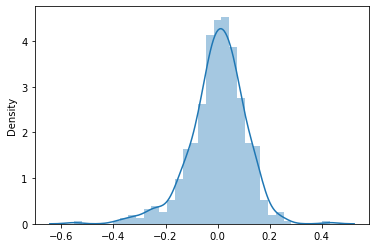

In [83]:
## plotting residuals
sns.distplot(res_train)
plt.show()

### The residuals seem to be showing more or less a normal distribution. Hence, the assumption of normality of error terms stand validated.

## 2. Linearity : There is a linear relationship between X and Y
### For that, we make the Pairplot

In [84]:
bike_new_plt = bike_new[['temp','atemp','windspeed','hum','cnt']]

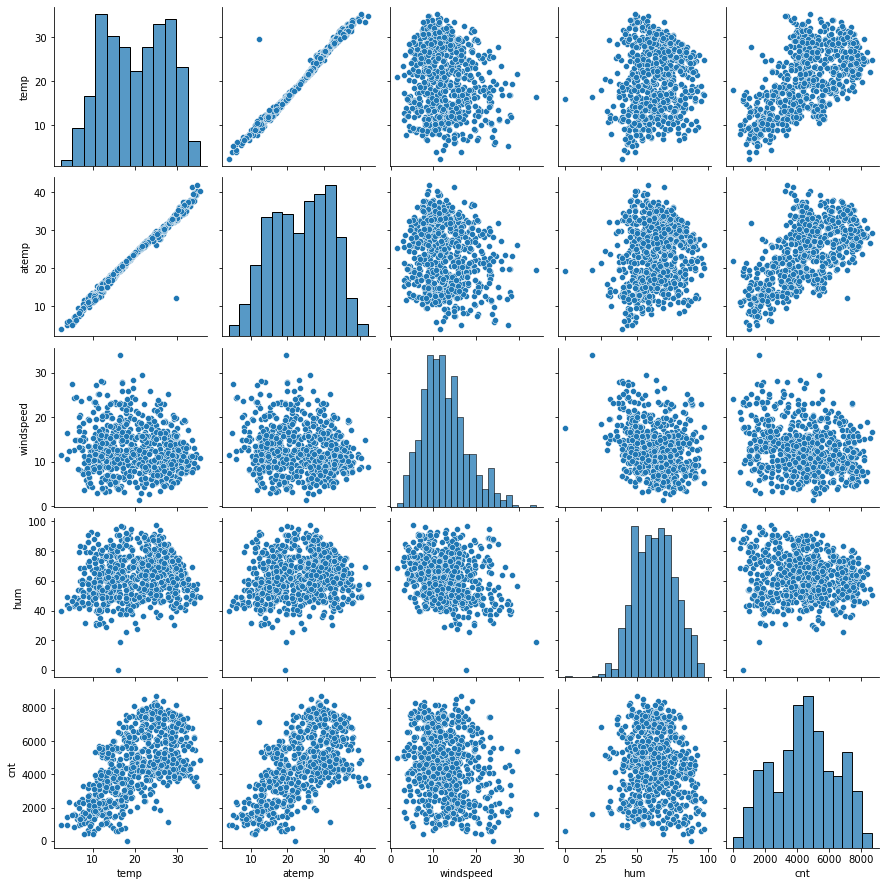

In [85]:
sns.pairplot(bike_new_plt)
plt.show()

### There seems to be some linear relationship between the dependent variable 'cnt' and the independent variables.  So the assumption of linearity also stands validated.

## 3. Little or No Multicollinearity among Predictors
### For checking this, we will plot a heatmap and also check the VIF scores.

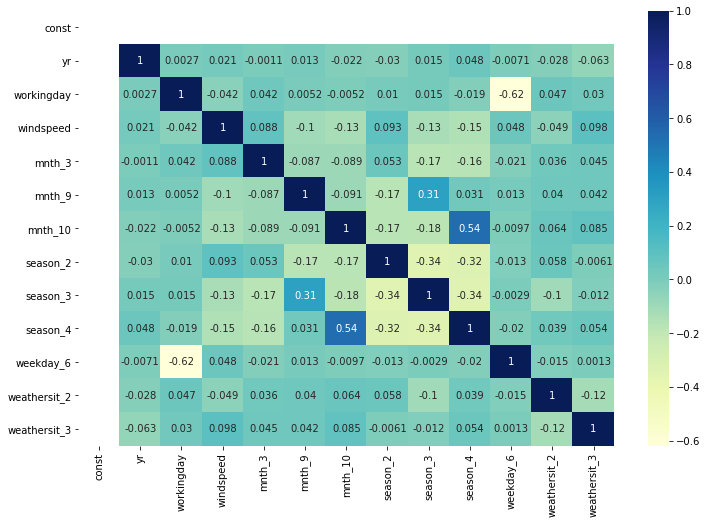

In [86]:
## plotting heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

In [87]:
## calcualating the VIF scores
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.91
9,season_4,2.16
8,season_3,1.86
2,workingday,1.63
10,weekday_6,1.63
7,season_2,1.54
6,mnth_10,1.46
5,mnth_9,1.17
4,mnth_3,1.13
3,windspeed,1.09


### From  the heatmap we can see very low corelations among the independent variables. and from the VIF table we can see that all values for VIF lie below 5. This validates the assumption of little or no Multicollinearity among Predictors

##  4. No Autocorrelation of the Error Terms

### We will look at the results of the Durbin_watson test

In [88]:
lm_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          4.09e-151
Time:                        18:52:35   Log-Likelihood:                 416.69
No. Observations:                 510   AIC:                            -807.4
Df Residuals:                     497   BIC:                            -752.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2359      0.020     11.626      0.000       0.196       0.276
yr               0.2438      0.010     25.246      0.000       0.225       0.263
workingday       0.0433      0.013      3.293      0.001       0.017       0.069
windspeed       -0.1759      0.031     -5.623      0.000      -0.237      -0.114
mnth_3           0.0564      0.019      2.976      0.003       0.019       0.094
mnth_9           0.0904      0.019      4.799      0.000       0.053       0.127
mnth_10          0.1059      0.021      5.078      0.000       0.065       0.147
season_2         0.2688      0.014     19.452      0.000       0.242       0.296
season_3         0.3169      0.015     21.305      0.000       0.288       0.346
season_4         0.1999      0.016     12.144      0.000       0.168       0.232
weekday_6        0.0459      0.017      2.687      0.007       0.012       0.079
weathersit_2    -0.0835      0.010     -8.082      0.000      -0.104      -0.063
weathersit_3    -0.3476      0.031    -11.136      0.000      -0.409      -0.286
==============================================================================
Omnibus:                       69.993   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.601
Skew:                          -0.723   Prob(JB):                     1.81e-36
Kurtosis:                       5.378   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The Durbin-Watson value of 1.978 of the model is almost equal to 2, which indicates no-autocorelation of the error terms.
### Even if we don't round-off this value, still 1.978 lies within the acceptable range of 1.5 to 2.5 for Durbin-Watson statistic.

## 5. Homoscedasticity : Same variance within the error terms

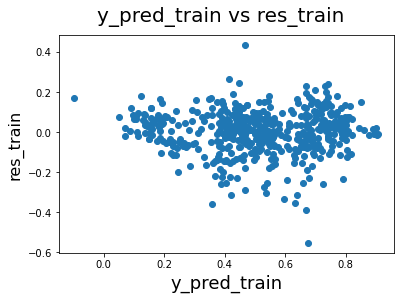

In [89]:
fig = plt.figure()
plt.scatter(y_pred_train,res_train)
fig.suptitle('y_pred_train vs res_train', fontsize=20)              # Plot heading 
plt.xlabel('y_pred_train', fontsize=18)                          # X-label
plt.ylabel('res_train', fontsize=16)
plt.show()

### The error terms do no show any pattern. This validates the assumption of Homoscedasticity 

## Step 8: Making predictions

 ####  First we will apply the scaling on the test sets

- STEPS:
- 1. Instantiate an object
     - already done while perfroming scaling on train_set
     - if we again Instantiate an object here, then it will require us to fit( ) on the test set as well.
- 2. Create a list of numeric variables
- 3. Transform on data

In [90]:
## Create a list of numeric variables
var = ['cnt','atemp','hum','windspeed','temp']

In [91]:
## Transform on data
bike_test[var] = scaler.transform(bike_test[var])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0


####  Dividing into X_test and y_test

In [92]:
y_test = bike_test.pop('cnt')

In [93]:
X_test = bike_test

### Using model to make predictions

- First,we need to create a new dataframe X_test_new which has the same coulmns as X_train_new.

In [94]:
# Let's check the list of variables selected for the model training
X_train_new.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'mnth_3', 'mnth_9', 'mnth_10',
       'season_2', 'season_3', 'season_4', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [95]:
# Add a constant to the test set created
X_test = sm.add_constant(X_test)

In [96]:
## creating new dataframe X_test_new which has the same coulmns as X_train_new
X_test_new = X_test[X_train_new.columns] 

#### Checking out the new dataframe

In [97]:
X_test_new.head()

,const,yr,workingday,windspeed,mnth_3,mnth_9,mnth_10,season_2,season_3,season_4,weekday_6,weathersit_2,weathersit_3
22,1.0,0,0,0.462217,0,0,0,0,0,0,0,0,0
468,1.0,1,0,0.347424,0,0,0,1,0,0,1,0,0
553,1.0,1,0,0.212829,0,0,0,0,1,0,0,0,0
504,1.0,1,0,0.478229,0,0,0,1,0,0,0,0,0
353,1.0,0,1,0.080770,0,0,0,0,0,1,0,1,0


In [98]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   windspeed     219 non-null    float64
 4   mnth_3        219 non-null    uint8  
 5   mnth_9        219 non-null    uint8  
 6   mnth_10       219 non-null    uint8  
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  weekday_6     219 non-null    uint8  
 11  weathersit_2  219 non-null    uint8  
 12  weathersit_3  219 non-null    uint8  
dtypes: float64(2), int64(2), uint8(9)
memory usage: 10.5 KB


In [99]:
# Predicting the y values corresponding to X_test_new
y_pred = lm_model4.predict(X_test_new)

In [100]:
X_test_new.shape

(219, 13)

In [101]:
y_pred.head()

22     0.154598
468    0.733189
553    0.759173
504    0.664287
353    0.381373
dtype: float64

## Step 9: Model Evaluation

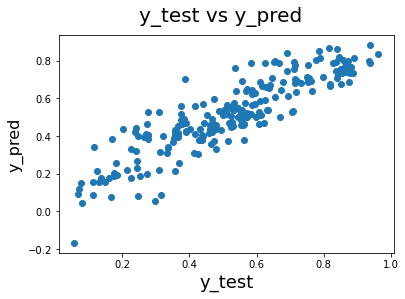

In [102]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.show()

### The model that seems good enough to predict demand of bikes. 
### The actual and predicted cnt i.e demand are significantly overlapping, thus indicating that the model is able to explain the change in demand very well.

## Looking at the RMSE

In [103]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [104]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.1004886106366563

### Checking the R-squared on the test set

In [105]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7903179847986816

### The R-Sqaured for test set is very close gto the R-Squared for the train set, this shows that the model is working fine on the test set.

### Checking the correlations between the final predictor variables

In [106]:
X_test_new.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'mnth_3', 'mnth_9', 'mnth_10',
       'season_2', 'season_3', 'season_4', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

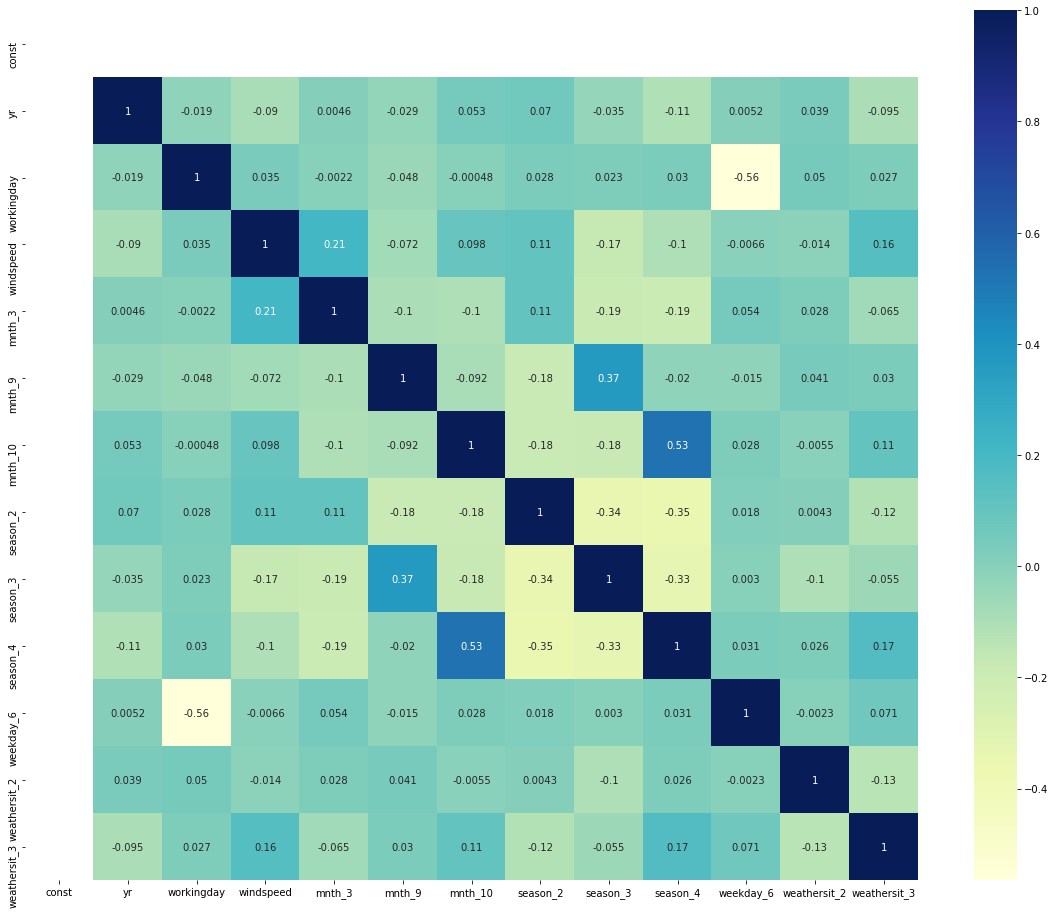

In [107]:
plt.figure(figsize=(20,16))
sns.heatmap(X_test_new.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

### We can see that the final predictor variables show very little corelations.

# Concluding the model

In [108]:
lm_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          4.09e-151
Time:                        18:52:36   Log-Likelihood:                 416.69
No. Observations:                 510   AIC:                            -807.4
Df Residuals:                     497   BIC:                            -752.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2359      0.020     11.626      0.000       0.196       0.276
yr               0.2438      0.010     25.246      0.000       0.225       0.263
workingday       0.0433      0.013      3.293      0.001       0.017       0.069
windspeed       -0.1759      0.031     -5.623      0.000      -0.237      -0.114
mnth_3           0.0564      0.019      2.976      0.003       0.019       0.094
mnth_9           0.0904      0.019      4.799      0.000       0.053       0.127
mnth_10          0.1059      0.021      5.078      0.000       0.065       0.147
season_2         0.2688      0.014     19.452      0.000       0.242       0.296
season_3         0.3169      0.015     21.305      0.000       0.288       0.346
season_4         0.1999      0.016     12.144      0.000       0.168       0.232
weekday_6        0.0459      0.017      2.687      0.007       0.012       0.079
weathersit_2    -0.0835      0.010     -8.082      0.000      -0.104      -0.063
weathersit_3    -0.3476      0.031    -11.136      0.000      -0.409      -0.286
==============================================================================
Omnibus:                       69.993   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.601
Skew:                          -0.723   Prob(JB):                     1.81e-36
Kurtosis:                       5.378   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  We can see that the equation for best fitted line is:

### cnt= 0.2359 X const +  0.2438 X yr + 0.0433 X workingday - 0.1759 X windspeed + 0.0564 X mnth_3 + 0.0904 X mnth_9 + 0.1059 X mnth_10 + 0.2688 X season_2 + 0.3169 X season_3 + 0.1999 X season_4 + 0.0459 X weekday_6 - 0.0835 X weathersit_2 - 0.3476 X weathersit_3

# Final Comments

## The top feautres that affect the demand for bikes are: 
### 1. weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.; This has a negative impact on bike demand.
### 2. season_3: fall; This positively impacts the bike demand
### 3. season_2: summer; This positively impacts the bike demand
### 4. yr: 2019; This positively impacts the bike demand
### 5. season_4: winter; This positively impacts the bike demand
### 6. windspeed; This has a negative impact on bike demand.
### 7. mnth_10; This positively impacts the bike demand